<a href="https://colab.research.google.com/github/mapmatters/GAN_tutorial/blob/master/02_03_deep_learning_conv_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 첫 번째 합성곱 신경망

In [0]:
# 라이브러리 임포트
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

## 데이터 적재

In [0]:
NUM_CLASSES = 10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [21]:
x_train[54, 12, 13, 1]


0.36862746

## 모델 만들기

In [0]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [23]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [25]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0   

## 모델 훈련

In [0]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [27]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 246s 5ms/step - loss: 1.5722 - acc: 0.4484 - val_loss: 1.1971 - val_acc: 0.5641
Epoch 2/10
50000/50000 [==============================] - 246s 5ms/step - loss: 1.1860 - acc: 0.5823 - val_loss: 1.0951 - val_acc: 0.6117
Epoch 3/10
50000/50000 [==============================] - 244s 5ms/step - loss: 1.0335 - acc: 0.6379 - val_loss: 0.9764 - val_acc: 0.6572
Epoch 4/10
50000/50000 [==============================] - 246s 5ms/step - loss: 0.9489 - acc: 0.6675 - val_loss: 0.9297 - val_acc: 0.6749
Epoch 5/10
50000/50000 [==============================] - 244s 5ms/step - loss: 0.8847 - acc: 0.6924 - val_loss: 0.8936 - val_acc: 0.6882
Epoch 6/10
50000/50000 [==============================] - 246s 5ms/step - loss: 0.8406 - acc: 0.7065 - val_loss: 0.9611 - val_acc: 0.6632
Epoch 7/10
50000/50000 [==============================] - 243s 5ms/step - loss: 0.7927 - acc: 0.7229 - val_loss: 0.8779 - 

In [28]:
model.layers[6].get_weights()

[]

## 모델 평가

In [29]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 14s 1ms/step


[0.8260585486888885, 0.7120000123977661]

In [0]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

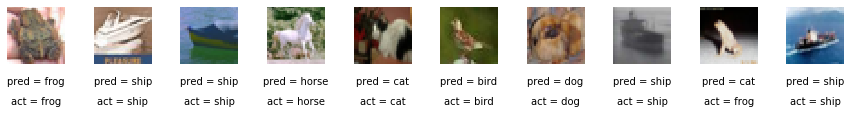

In [32]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)